In [1]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
from graph_generation.load_graphs_and_create_metadata import dataset_metadata
from graph_matching_tools.metrics import matching
from graph_matching_tools.io.graph_dataset import GraphDataset
from graph_matching_tools import *
import matplotlib.pyplot as plt
import tools.graph_processing as gp
import scipy.io as sio
import copy

In [12]:
def create_random_graph_method(size, node_number, edge_proba, shuffle=False,
                               add_noise=False, node_noise_variance=1.0,
                               edge_noise_variance=1.0, node_data_dim=1, edge_data_dim=1,
                               remove_nodes=False, max_node_removed=5):
    """Use Erdos-Renyi way of generating graph

    :param size: the number of graphs
    :param node_number: the number of nodes
    :param edge_proba: the proba for edges
    :param shuffle: if True shuffle the nodes
    :param add_noise: if True add noise on data
    :param node_noise_variance: the variance of the noise on node data
    :param edge_noise_variance: the variance of the noise on edge data
    :param node_data_dim: the dimension of the data of nodes
    :param edge_data_dim: the dimension of the data of edges
    :param remove_nodes: True to remove nodes at random (they are transformed into dummy nodes)
    :param max_node_removed: the maximal number of removed nodes
    :return: a random graph
    """
    graphs = []
    graph1 = nx.gnp_random_graph(node_number, edge_proba)
    print(graph1)

    for node in graph1:
        graph1.nodes[node]["weight"] = np.random.uniform(0, 1, size=(node_data_dim,))

    for u, v in graph1.edges:
        graph1.edges[u, v]["weight"] = np.random.uniform(0, 1, size=(edge_data_dim,))

    graphs.append(graph1)
    for idx in range(size - 1):
        graphs.append(copy.deepcopy(graph1))

    if add_noise:
        for graph in graphs:
            for node in graph:
                graph.nodes[node]["weight"] += np.random.randn(node_data_dim) * node_noise_variance
            for u, v in graph.edges:
                graph.edges[u, v]["weight"] += np.random.randn(edge_data_dim) * edge_noise_variance

    if shuffle:
        e_graphs, e_index = permut.randomize_nodes_position(graphs[1:])
        graphs = [graphs[0], ] + e_graphs
        g_index = [list(range(node_number)), ] + e_index
    else:
        g_index = [list(range(node_number)), ]
        for i in range(size - 1):
            g_index.append(list(range(node_number)))

    dummy_index = []
    if remove_nodes:
        for i_g in range(len(graphs)):
            dummies = []
            nb_removed = np.random.randint(0, np.minimum(max_node_removed+1, nx.number_of_nodes(graphs[i_g])))
            idx = np.random.choice(graphs[i_g].nodes, nb_removed, replace=False)
            # Transform the nodes into dummy nodes
            for i_n in idx:
                dummies.append(i_n)
                graphs[i_g].nodes[i_n]["weight"] = np.zeros((node_data_dim, 1)) + 1e9  # Change to impossible values
                neigs = list(nx.neighbors(graphs[i_g], i_n))
                for neig in neigs:
                    graphs[i_g].remove_edge(i_n, neig)
            dummy_index.append(dummies)

    return graphs, g_index, dummy_index

In [13]:
all_graphs, all_index, dummy_index = create_random_graph_method(size = 10, node_number = 20,edge_proba= 0.05,add_noise=False,node_noise_variance=1.0,
                                                                    node_data_dim=10,
                                                                    edge_noise_variance=1.0,
                                                                    edge_data_dim=10,
                                                                    remove_nodes=False,
                                                                    max_node_removed=5
                                                                    )

Graph with 20 nodes and 11 edges


In [23]:
list(all_graphs[0].edges.data())[0]

(1,
 2,
 {'weight': array([0.17307111, 0.22344363, 0.07082297, 0.09205092, 0.02079732,
         0.9529699 , 0.86344485, 0.36049606, 0.83052278, 0.99416753])})

In [28]:
all_graphs[5].nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

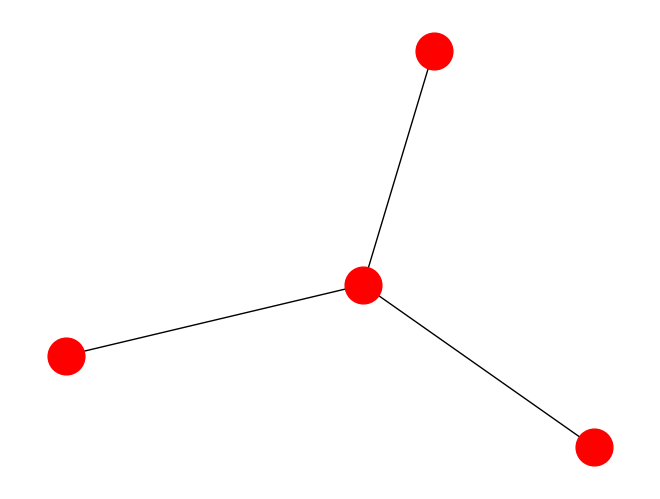

In [36]:
G = nx.star_graph(3)
nx.draw(G,node_color='red',node_size = 700)

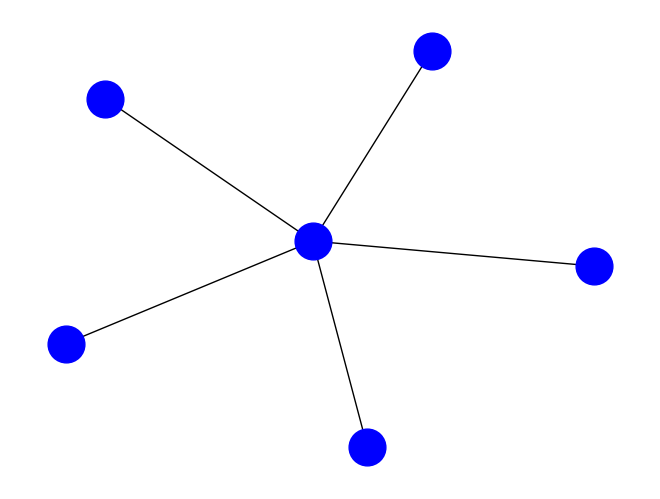

In [37]:
G = nx.star_graph(5)
nx.draw(G,node_color='blue',node_size = 700)

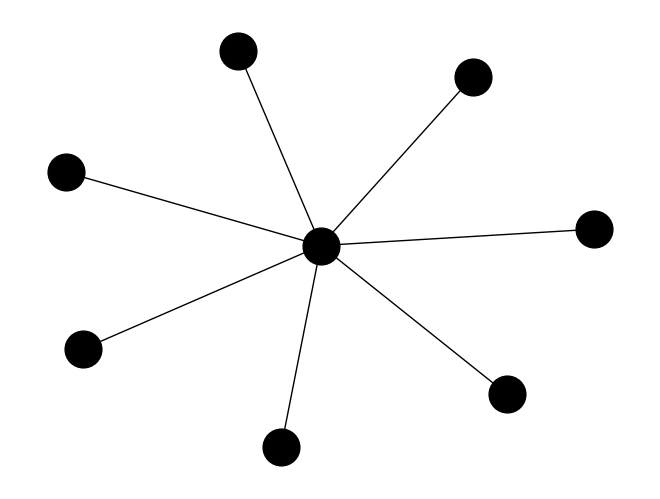

In [41]:
G = nx.star_graph(7)
nx.draw(G,node_color='black',node_size = 700)